# Sistema de predicción del clima

# Nombres
### Juan Pablo Grisales Botero
### Cristian Camilo Rodriguez
### Diego Sanabria

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Se cuenta con la información sobre el clima de los meses de enero a mayo del 2017. Se necesita generar la regresión que mejor se ajuste al comportamiento climático de dichos meses.

In [2]:
df = pd.read_csv('time_series.csv',  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','unidades'])
t = df['2017-01-01':'2017-05-30']

1- Grafique el comportamiento climático almacenado en t (0.2).

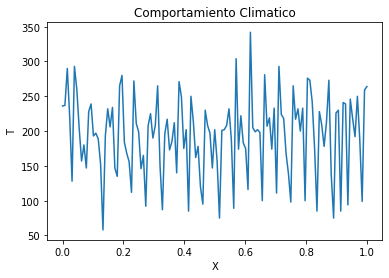

In [3]:
x = np.linspace(0,1,t.size)

plt.plot(x,t)
plt.title("Comportamiento Climatico")
plt.xlabel("X")
plt.ylabel("T")
plt.show()

2- Desarrolle una función con la cual se pueda generar phi con cualquiera de las tres funciones base (Polinomial, Exponencial y Sigmoildal). Para las funciones exponencial y sigmoidal genere los valores de la media con un $linspace$ entre 0 y 1 de tamaño $m$. Para la funcion exponencial use $s = 0.007$ y para la sigmoidal $s = 0.01$ (0.8).

In [4]:
def polinomial(x,i):
#   print (str(x)+"  **  "+str(i))
    return x**i

def exponencial(x,u):
    
    if u == 0:
        
        return 1
    
    else:
        
        return np.exp(-(((x-u) ** 2)/(2*(0.007**2))))
    

def sigmoidal(x,u):
    if u == 0:
        return 1
    
    else:
        a = ((x-u)/0.01)
        return 1/(1+ np.exp(-a))

def generarDelphi (x,u,funcion):
    phi = np.zeros((len(x),len(u)))
    
    for i in range (x.size):
        
        for j in range (u.size):
            phi[i][j] = funcion(x[i],u[j])
        
    return phi



3- Desarrolle dos funciones, una para generar W y otra para calcular el error medio cuadrático (0.5).

In [5]:
def generarW (phi,t):
    return   (np.linalg.inv(( phi.T @ phi )) @ phi.T ) @ t

def calcularError (t, tP):
    suma=0
    
    for i in range (0,len(t)):
        suma = suma + ( tP[i] - t[i] ) ** 2
        return (1/(2*len(t))) * suma

4- Usando la función polinomial proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores M, E, Titulo (0.7). 

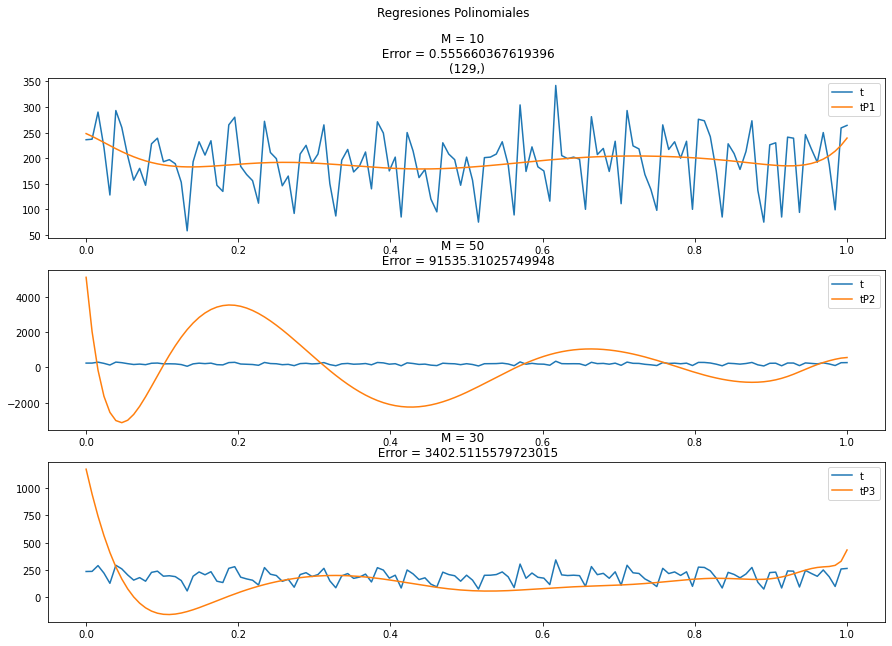

In [49]:
def generarTPpolinomial (m,t):
    i = np.arange(m)
    phi = generarDelphi(x,i,polinomial)
    w = generarW(phi,t)
    tP = phi @ w
    return tP , w

tP1 , wP1 = generarTPpolinomial (10,t)
tP2 , wP2 = generarTPpolinomial (50,t)
tP3 , wP3 = generarTPpolinomial (30,t)

errorTP1 = calcularError (t,tP1)
errorTP2 = calcularError (t,tP2)
errorTP3 = calcularError (t,tP3)


plt.subplots(3,1,figsize=(15,10))
plt.suptitle("Regresiones Polinomiales")

plt.subplot(3,1,1)
plt.plot(x,t,x,tP1)
plt.legend(['t','tP1'])
plt.title("M = 10  \n Error = " + str(errorTP1) +"\n"+ str(tP1.shape))

plt.subplot(3,1,2)
plt.plot(x,t,x,tP2)
plt.legend(['t','tP2'])
plt.title("M = 50  \n Error = " + str(errorTP2))

plt.subplot(3,1,3)
plt.plot(x,t,x,tP3)
plt.legend(['t','tP3'])
plt.title("M = 30  \n Error = " + str(errorTP3))

plt.show()

5- Usando la función exponencial proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. . Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores de cada predicción en el titulo de la gráfica (0.7). 

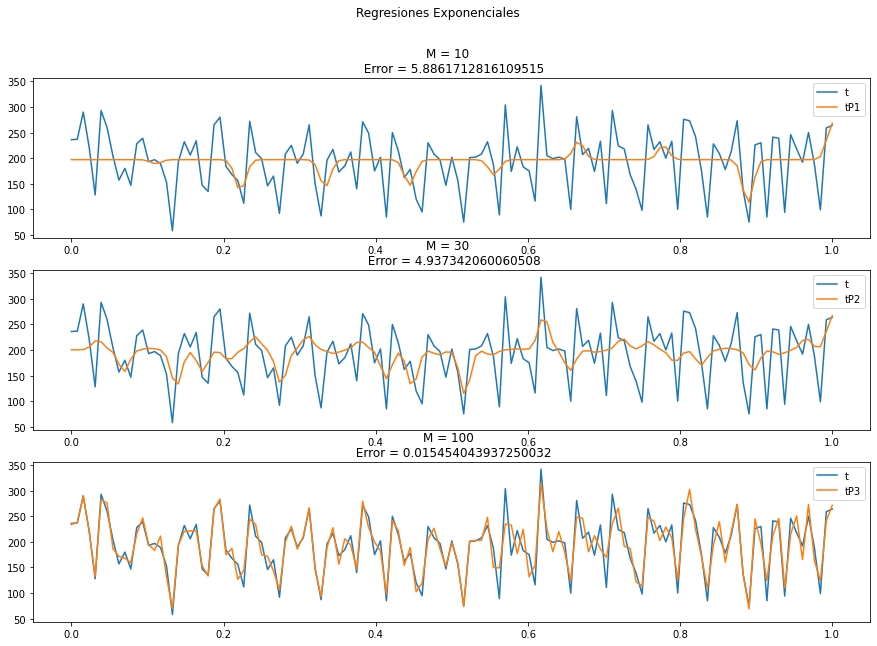

In [50]:
def generarTPexponencial (m,t):
    u = np.linspace(0,1,m)
    phi = generarDelphi(x,u,exponencial)
    w = generarW(phi,t)
    tP = phi @ w
    return tP , w

tP1 , wE1 = generarTPexponencial (10,t)
tP2 , wE2 = generarTPexponencial (30,t)
tP3 , wE3 = generarTPexponencial (100,t)

errorTP1 = calcularError (t,tP1)
errorTP2 = calcularError (t,tP2)
errorTP3 = calcularError (t,tP3)


plt.subplots(3,1,figsize=(15,10))
plt.suptitle("Regresiones Exponenciales")

plt.subplot(3,1,1)
plt.plot(x,t,x,tP1)
plt.legend(['t','tP1'])
plt.title("M = 10  \n Error = " + str(errorTP1))

plt.subplot(3,1,2)
plt.plot(x,t,x,tP2)
plt.legend(['t','tP2'])
plt.title("M = 30  \n Error = " + str(errorTP2))

plt.subplot(3,1,3)
plt.plot(x,t,x,tP3)
plt.legend(['t','tP3'])
plt.title("M = 100  \n Error = " + str(errorTP3))

plt.show()

6- Usando la función sigmoidal proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. . Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores de cada predicción en el titulo de la gráfica (0.7). 

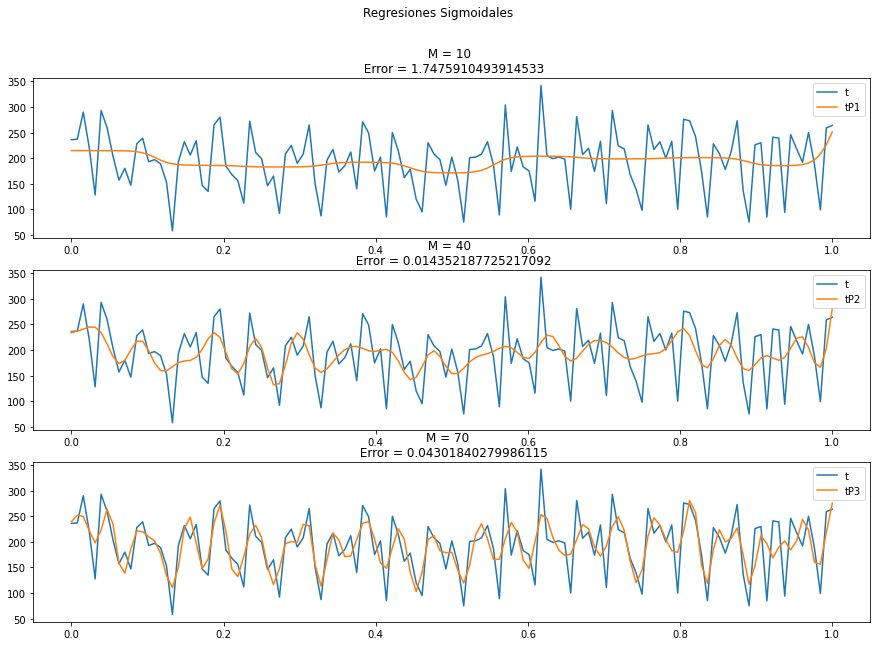

In [52]:
def generarTPsigmoidal (m,t):
    u = np.linspace(0,1,m)
    phi = generarDelphi(x,u,sigmoidal)
    w = generarW(phi,t)
    tP = phi @ w
    return tP , w

tP1 , wS1= generarTPsigmoidal (10,t)
tP2 , wS2 = generarTPsigmoidal (40,t)
tP3 , wS3 = generarTPsigmoidal (70,t)

errorTP1 = calcularError (t,tP1)
errorTP2 = calcularError (t,tP2)
errorTP3 = calcularError (t,tP3)


plt.subplots(3,1,figsize=(15,10))
plt.suptitle("Regresiones Sigmoidales")

plt.subplot(3,1,1)
plt.plot(x,t,x,tP1)
plt.legend(['t','tP1'])
plt.title("\n M = 10  \n Error = " + str(errorTP1))

plt.subplot(3,1,2)
plt.plot(x,t,x,tP2)
plt.legend(['t','tP2'])
plt.title("\n M = 40  \n Error = " + str(errorTP2))

plt.subplot(3,1,3)
plt.plot(x,t,x,tP3)
plt.legend(['t','tP3'])
plt.title("M = 70  \n Error = " + str(errorTP3))

plt.show()

7- ¿Cual solución piensa que es la mejor que se ajusta al comportamiento climático? Justifique (0.6).

In [1]:
## Para nuestro concepto y segun lo que se evidencia al realizar el ejercicio la solucion que mas se ajusta para calcular
## el cambio climatico es la funcion sigmoidal ya que al realizar la prueba con las tres M diferentes es la que cuenta con
## un porcentaje de error mucho mas bajo que en las otras funciones, ademas si la ejecutamos con una M = 40 podemos evidenciar  en la grafica que tiene un porcentaje de error 
## del 0.01 el cual es elas bajo de toda la prueba

8- Realice la predicción del mes de junio del 2017 usando su mejor modelo encontrado en los puntos anteriores. Realice el grafico comparativo de su predicción con el valor real. Muestre en el gráfico solo la parte predecida (0.8).

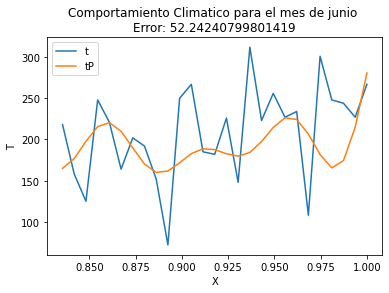

In [48]:
def prediccion (w , xP, m):
    u = np.linspace(0,1,m)
    phi = generarDelphi(xP,u,sigmoidal)
    tPr = phi @ w
    return tPr

xP = np.linspace(0,1,len(t)+30)
tPr = prediccion(wS2,xP, 40)
taux = df['2017-06-01':'2017-06-30']
err = calcularError( taux, tPr[132:])

plt.plot(xP[132:],taux,xP[132:],tPr[132:])
plt.title("Comportamiento Climatico para el mes de junio \nError: "+ str(err))
plt.xlabel("X")
plt.ylabel("T")
plt.legend(['t','tP'])
plt.show()

